In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Датасет 1 (cars)

In [3]:
data = pd.read_csv('data/spam.csv')
data.describe()

,text_type,text
count,16278,16278
unique,2,16267
top,ham,SPAM ALERT 🚔 User: Username: @DillyBubbl...
freq,11469,7


In [4]:
data.head()

,text_type,text
0,ham,make sure alex knows his birthday is over in f...
1,ham,a resume for john lavorato thanks vince i will...
2,spam,plzz visit my website moviesgodml to get all m...
3,spam,urgent your mobile number has been awarded wit...
4,ham,overview of hr associates analyst project per ...


# Очистка

In [5]:
# очистка от пропусков
data = data.dropna()
data.isnull().sum()

text_type    0
text         0
dtype: int64

In [6]:
# удаление дубликатов
data = data.drop_duplicates()

# Анализ

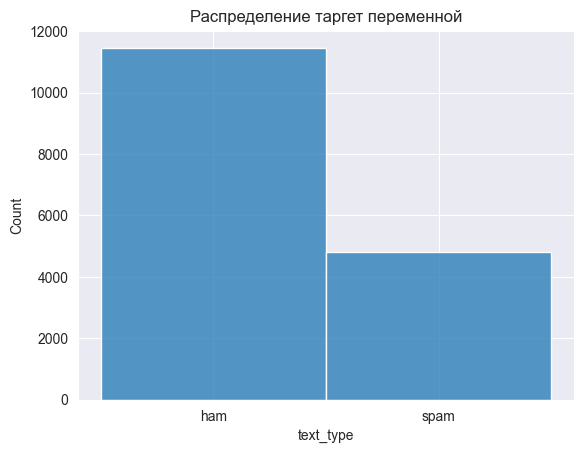

In [7]:
sns.histplot(data['text_type'], bins=10)
plt.title(f"Распределение таргет переменной")
plt.show()

In [8]:
# закодируем числовой признак
label_encoder = LabelEncoder()
data['text_type'] = label_encoder.fit_transform(data['text_type'])
data.head()

,text_type,text
0,0,make sure alex knows his birthday is over in f...
1,0,a resume for john lavorato thanks vince i will...
2,1,plzz visit my website moviesgodml to get all m...
3,1,urgent your mobile number has been awarded wit...
4,0,overview of hr associates analyst project per ...


# Обучение

In [10]:
# разделим на тестовую и обучающую выборки и закодируем текст как вектор

X = data['text']
y = data['text_type']

X_tfidf = TfidfVectorizer().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [12]:
X_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 505201 stored elements and shape (13013, 53378)>

In [13]:
y_train.head()

8683     0
14665    1
10367    0
14756    0
11034    1
Name: text_type, dtype: int64

In [14]:
# классификаторы
logistic_regression_cls = LogisticRegression(random_state=42)
decision_tree_cls = DecisionTreeClassifier(random_state=42)

# обучение модели
logistic_regression_cls.fit(X_train, y_train)
decision_tree_cls.fit(X_train, y_train)

None

In [15]:
# предсказание результатов
y_pred_log = logistic_regression_cls.predict(X_test)
y_pred_tree = decision_tree_cls.predict(X_test)

y_pred_proba_log = logistic_regression_cls.predict_proba(X_test)[:, 1]
y_pred_proba_tree = decision_tree_cls.predict_proba(X_test)[:, 1]

# Результаты

In [16]:
# precision, recall, f1
print("Метрики для логистической регрессия:")
print(classification_report(y_test, y_pred_log))

Метрики для логистической регрессия:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      2271
           1       0.95      0.78      0.86       983

    accuracy                           0.92      3254
   macro avg       0.93      0.88      0.90      3254
weighted avg       0.92      0.92      0.92      3254



In [17]:
# precision, recall, f1
print("Метрики для дерева решений:")
print(classification_report(y_test, y_pred_tree))

Метрики для дерева решений:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      2271
           1       0.84      0.81      0.83       983

    accuracy                           0.90      3254
   macro avg       0.88      0.87      0.88      3254
weighted avg       0.90      0.90      0.90      3254



In [18]:
def show_confusion_matrix(y_pred, title: str):
    matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(matrix, annot=True, fmt='d')
    plt.title(title)
    plt.show()

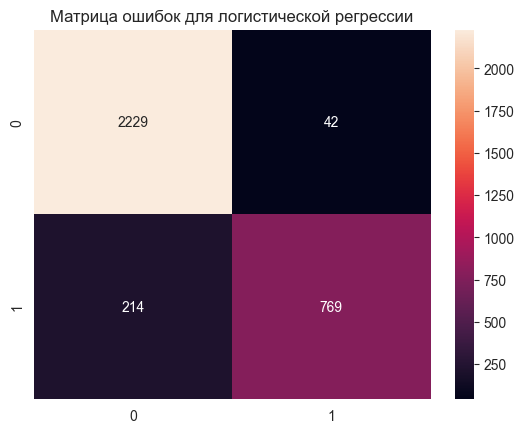

In [19]:
show_confusion_matrix(y_pred_log, "Матрица ошибок для логистической регрессии")

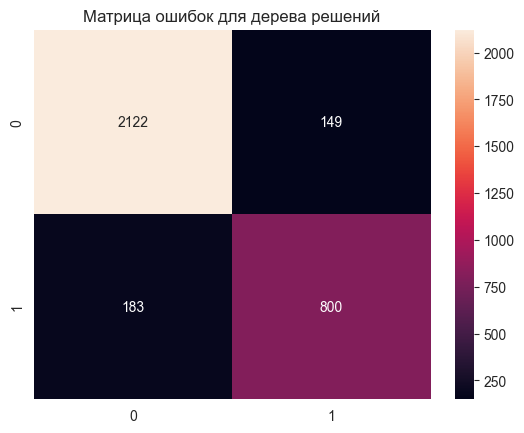

In [20]:
show_confusion_matrix(y_pred_tree, "Матрица ошибок для дерева решений")

In [21]:
fpr_log, tpr_log, _ = roc_curve(y_test, logistic_regression_cls.predict_proba(X_test)[:, 1])
fpr_tree, tpr_tree, _ = roc_curve(y_test, decision_tree_cls.predict_proba(X_test)[:, 1])

roc_auc_log = roc_auc_score(y_test, y_pred_proba_log)
roc_auc_tree = roc_auc_score(y_test, y_pred_proba_tree)

print(f"Логистическая регрессия: ROC AUC = {roc_auc_log:.4f}")
print(f"Дерево решений: ROC AUC = {roc_auc_tree:.4f}")

Логистическая регрессия: ROC AUC = 0.9754
Дерево решений: ROC AUC = 0.8807


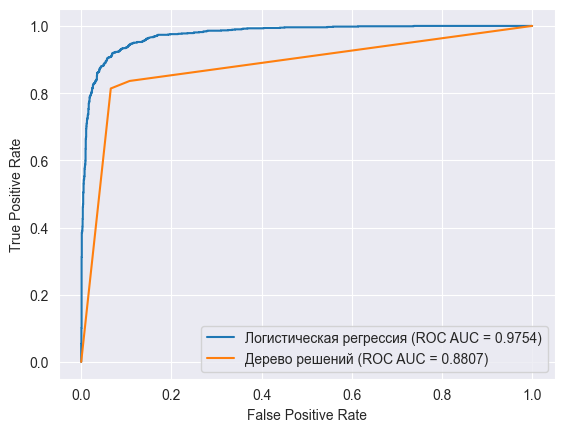

In [22]:
plt.plot(fpr_log, tpr_log, label=f"Логистическая регрессия (ROC AUC = {auc(fpr_log, tpr_log):.4f})")
plt.plot(fpr_tree, tpr_tree, label=f"Дерево решений (ROC AUC = {auc(fpr_tree, tpr_tree):.4f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()